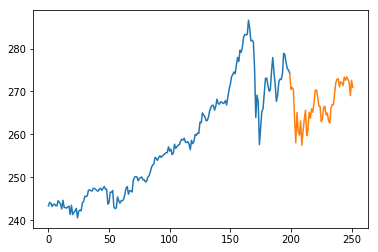

In [275]:
import matplotlib.pyplot as plt
import pandas as pd
variables = pd.read_csv("Stocks.csv")
variables.shape
dates = pd.to_datetime(variables['Date'])


price = variables['Close']
plt.plot(price[:200])
plt.plot(price[199:])

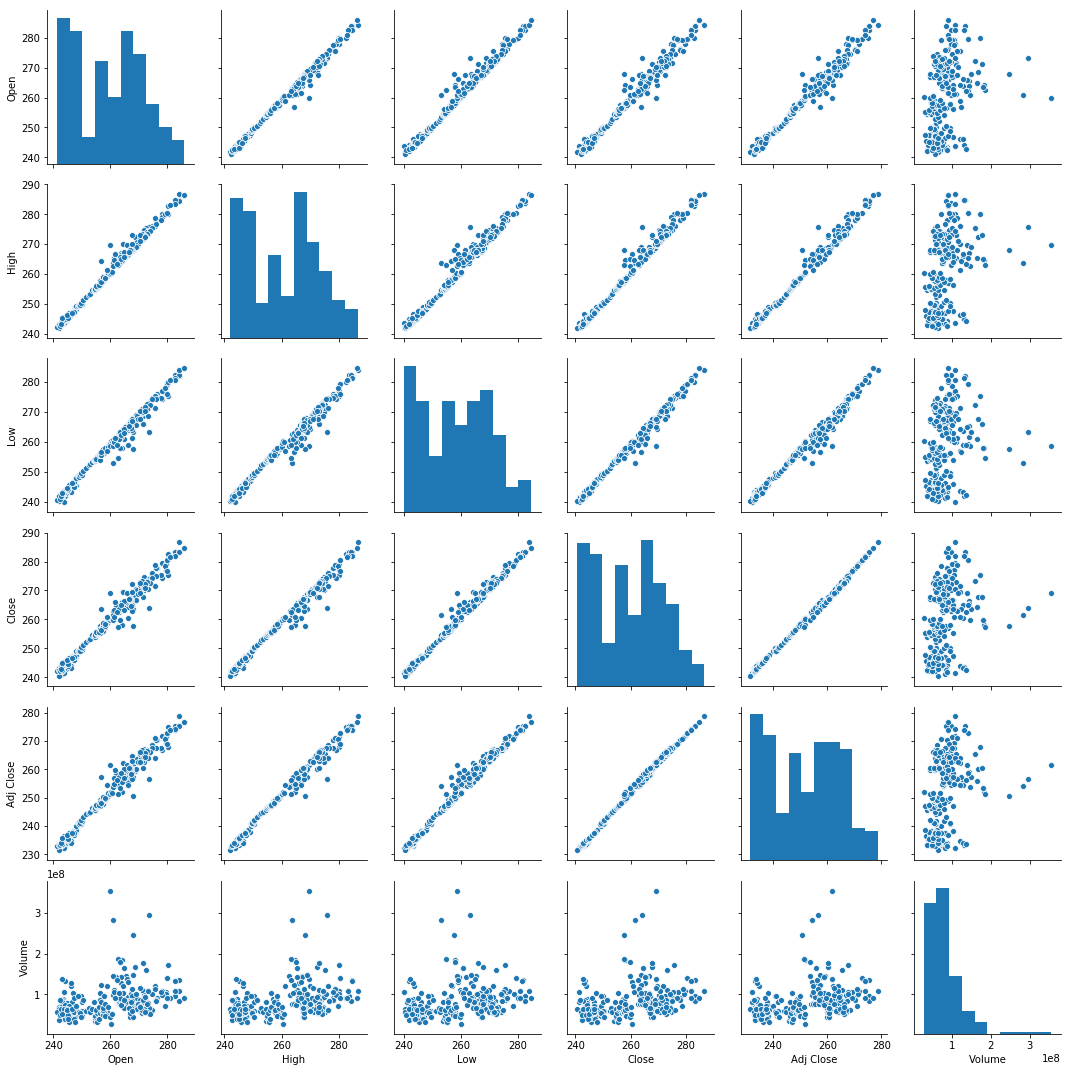

In [276]:
import seaborn as sns
sns.pairplot(variables)

In [294]:
from keras.layers import LSTM, Dense, Flatten
from keras.models import Sequential

from sklearn.preprocessing import MinMaxScaler

data = variables.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(variables)),columns=['Date', 'Close'])
for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]

new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)
dataset = new_data.values

import numpy as np
train = dataset[0:200,:]
valid = dataset[199:,:]
sc = MinMaxScaler(feature_range =(0,1))
dataset = sc.fit_transform(dataset)
x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(dataset[i-60:i,0])
    y_train.append(dataset[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

/Users/maccs3/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [305]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam', metrics = ['mse'])
model.fit(x_train, y_train, epochs = 1)


Epoch 1/1
140/140 [==============================] - 17s 122ms/step - loss: 0.2051 - mean_squared_error: 0.2051


In [306]:
inputs = new_data[len(new_data) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = sc.transform(inputs)

X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = sc.inverse_transform(closing_price)

In [307]:
inputs = new_data[len(new_data) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = sc.transform(inputs)

X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = sc.inverse_transform(closing_price)


/Users/maccs3/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


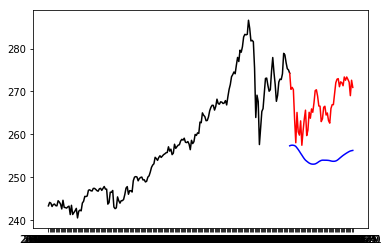

In [308]:
train = new_data[:200]
valid = new_data[199:]
valid['Predictions'] = closing_price


plt.plot(train['Close'], color = 'black')
plt.plot(valid['Close'], color = 'red')
plt.plot(valid['Predictions'], color = 'blue')
plt.show()

In [309]:
np.mean(np.power((valid-closing_price),2))

Close          173.881746
Predictions      0.000000
dtype: float64

In [289]:
len(X_test)

53